# News Classification
ASHWIN U IYER <br>
19BAI1118

In [1]:
import nltk #Importing NLP library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
messages = pd.read_csv("./data/train.csv",nrows=60000)

In [4]:
messages.shape

(60000, 3)

<font size="5">***Exploratory Data Analysis*** <font>

In [5]:
messages.head()

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [6]:
messages.describe()

,Class Index
count,60000.000000
mean,2.493650
std,1.130758
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,4.000000


Observing the unique features of ham and spam seperately, which can be later used for Feature Engineering

In [7]:
messages.groupby('Class Index').describe()

Title                                                            \
             count unique                                                top   
Class Index                                                                    
1            15513  14928  Sharon Allows 1,000 More Settler Homes in West...   
2            14701  14245                                             SI.com   
3            14440  13746                       Nortel Warns of Weaker Sales   
4            15346  14333                                 Enter your e-mail:   

                 Description         \
            freq       count unique   
Class Index                           
1              6       15513  15363   
2             34       14701  14610   
3              6       14440  14255   
4             23       15346  15124   

                                                                     
                                                           top freq  
Class Index                                                          
1            BAGHDAD, Iraq - Militants pounded central Bagh...    4  
2                                                       #NAME?    7  
3            With the economy slowly turning up, upgrading ...    3  
4            With the economy slowly turning up, upgrading ...   12

A useful feature would be Message Length so we shall engineer that

In [8]:
messages['length']=messages['Title'].apply(len)

In [9]:
messages.head()

,Class Index,Title,Description,length
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...",49
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,51
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,47
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,60
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...",73


In [10]:
%matplotlib inline

<AxesSubplot:xlabel='Class Index', ylabel='length'>

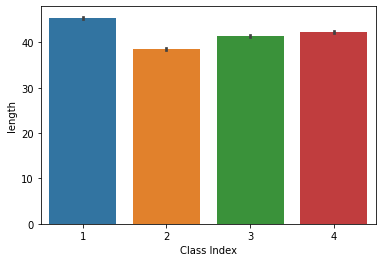

In [11]:
sns.barplot(x=messages['Class Index'],y=messages['length'])

<AxesSubplot:ylabel='Frequency'>

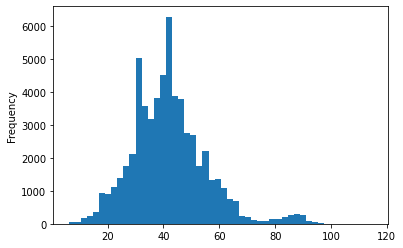

In [12]:
messages['length'].plot.hist(bins=50)

In [13]:
messages['length'].max()

115

In [14]:
print(messages[messages['length']==115]['Title'].iloc[0])

Attachmate Heightens Security, Centralises Management and Brings Microsoft Usability to Host Access with EXTRA! ...


array([[<AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>],
       [<AxesSubplot:title={'center':'3'}>,
        <AxesSubplot:title={'center':'4'}>]], dtype=object)

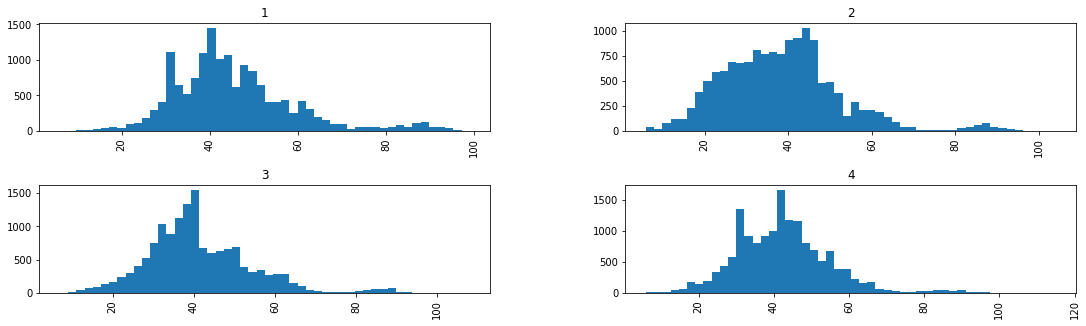

In [15]:
messages.hist(column='length',by='Class Index', figsize=(18,5),bins=50)

<font size='5'>***Text Preprocessing***<font>

In [16]:
#Importing the string library
import string

<font size='4'>**Stopword Removal**<font>

Stopwords are most commonly used words that don't add much meaning to the message. Listed below are the more commonly used ones

In [17]:
#Importing stopwordds
from nltk.corpus import stopwords

In [18]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

<font size='4'>**Tokenization**<font>

Tokenising means breaking down the message into words individually, making it easier to analyse and compute

In [19]:
def text_cleaner(mess):
    '''
    1.Remove Punctuations
    2.Remove stopwords
    '''
    nopunc=[char for char in mess if char not in string.punctuation]#Seperates to individual chars and removes puncs
    nopunc=''.join(nopunc)#Joins individual characters
    nopunc=nopunc.split()#splits string to a list of individual words
    return [word for word in nopunc if word.lower() not in stopwords.words('english') ]#return nopunc after removing stopwords

In [20]:
mess="Is this the real life? Is this just fantasy? Caught in a landslide, no escape from reality."
mess=text_cleaner(mess)
mess

['real', 'life', 'fantasy', 'Caught', 'landslide', 'escape', 'reality']

In [21]:
messages['Title'].head().apply(text_cleaner)

0        [Wall, St, Bears, Claw, Back, Black, Reuters]
1    [Carlyle, Looks, Toward, Commercial, Aerospace...
2      [Oil, Economy, Cloud, Stocks, Outlook, Reuters]
3    [Iraq, Halts, Oil, Exports, Main, Southern, Pi...
4    [Oil, prices, soar, alltime, record, posing, n...
Name: Title, dtype: object

<font size='5'>***Vectorization***<font>

Vectorization is the process of converting tokenised text data from the preprocessing phase to numerical data that can be used to build a ML model

In [22]:
#CountVectorizer does the job of tokenising the data and building the vocabulary
from sklearn.feature_extraction.text import CountVectorizer

In [23]:
#Analyzer is the function used to clean data. There are pre-built one too
bow_transformer=CountVectorizer(analyzer=text_cleaner).fit(messages['Title'])

In [24]:
mess6=messages['Title'][3]
mess6

'Iraq Halts Oil Exports from Main Southern Pipeline (Reuters)'

In [25]:
bow6=bow_transformer.transform([mess6])

In [26]:
print(bow6)

  (0, 9504)	1
  (0, 11579)	1
  (0, 13023)	1
  (0, 14876)	1
  (0, 16873)	1
  (0, 18049)	1
  (0, 19857)	1
  (0, 21981)	1


In [27]:
print(bow6.shape)

(1, 38506)


In [28]:
#To get the names of the words in bow6, we can use get_feature_names()
bow_transformer.get_feature_names()[4629]

C:\Users\Ashwin\miniconda3\envs\NLP\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


'Bin'

In [29]:
#Tranforming all the messages to a Sparse Matrix
bow_messages=bow_transformer.transform(messages['Title'])

In [30]:
print(bow_messages.shape)

(60000, 38506)


In [31]:
print(bow_messages)

  (0, 4117)	1
  (0, 4387)	1
  (0, 4692)	1
  (0, 6379)	1
  (0, 19857)	1
  (0, 22241)	1
  (0, 25101)	1
  (1, 2931)	1
  (1, 5843)	1
  (1, 6659)	1
  (1, 14524)	1
  (1, 19857)	1
  (1, 23781)	1
  (2, 6467)	1
  (2, 8833)	1
  (2, 16873)	1
  (2, 17160)	1
  (2, 19857)	1
  (2, 22433)	1
  (3, 9504)	1
  (3, 11579)	1
  (3, 13023)	1
  (3, 14876)	1
  (3, 16873)	1
  (3, 18049)	1
  :	:
  (59995, 2434)	1
  (59995, 14898)	1
  (59995, 26968)	1
  (59996, 7183)	1
  (59996, 12452)	1
  (59996, 16448)	1
  (59996, 20073)	1
  (59996, 20283)	1
  (59996, 20285)	1
  (59996, 23161)	1
  (59997, 4406)	1
  (59997, 11530)	1
  (59997, 26729)	1
  (59997, 37888)	1
  (59998, 7173)	1
  (59998, 27517)	1
  (59998, 30681)	1
  (59998, 32784)	1
  (59999, 22595)	1
  (59999, 28304)	1
  (59999, 30109)	1
  (59999, 32832)	1
  (59999, 32874)	1
  (59999, 36878)	1
  (59999, 37118)	1


In [32]:
bow_messages.nnz #Non zero occurences

332810

In [33]:
from sklearn.feature_extraction.text import TfidfTransformer #For computing tf and idf values and normalising them (default=l2)

In [34]:
tfidf=TfidfTransformer().fit(bow_messages)

In [35]:
#Tranforming word counts given in bow6 to TFIDF values. This is what will be done for each message
tfidf4=tfidf.transform(bow6)

In [36]:
print(tfidf4)

  (0, 21981)	0.3812355789024293
  (0, 19857)	0.19927152241591653
  (0, 18049)	0.4005755843713527
  (0, 16873)	0.23021193485571867
  (0, 14876)	0.44996828649849746
  (0, 13023)	0.22616525069079127
  (0, 11579)	0.42816447777239397
  (0, 9504)	0.40564141860512576


In [37]:
messages_tfidf=tfidf.transform(bow_messages)

In [38]:
#To find the idf of 'U'
tfidf.idf_[bow_transformer.vocabulary_['U']]

8.911074054373701

## Model Building

In [39]:
#Naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB

In [40]:
#Instantiating Naive Bayes Classifier
model=MultinomialNB().fit(messages_tfidf,messages['Class Index'])

In [41]:
#Predicitng on a sample text message
model.predict(tfidf4)[0]

1

In [42]:
messages['Class Index'][3]

3

In [43]:
messages['Title'][3]

'Iraq Halts Oil Exports from Main Southern Pipeline (Reuters)'

In [44]:
messages.iloc[3,:]

Class Index                                                    3
Title          Iraq Halts Oil Exports from Main Southern Pipe...
Description    Reuters - Authorities have halted oil export\f...
length                                                        60
Name: 3, dtype: object

## Train Test Split

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(messages['Title'], messages['Class Index'], test_size=0.3, random_state=42)

In [47]:
#All the above steps can be done using one feature called the pipeline 
from sklearn.pipeline import Pipeline

In [48]:
pl=Pipeline([
    ('bow',CountVectorizer()),
    ('classifier',MultinomialNB())
])

In [49]:
pl2=Pipeline([
    ('bow',CountVectorizer(ngram_range=(2, 4))),
    ('classifier',MultinomialNB())
])

In [50]:
pl.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('classifier', MultinomialNB())])

In [51]:
pl2.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer(ngram_range=(2, 4))),
                ('classifier', MultinomialNB())])

In [52]:
pl_pred=pl.predict(X_test)
pl2_pred=pl2.predict(X_test)

In [53]:
from sklearn.metrics import classification_report

## With Bag of Words Performance

In [54]:
print(classification_report(y_test,pl_pred))

              precision    recall  f1-score   support

           1       0.85      0.85      0.85      4513
           2       0.89      0.90      0.90      4467
           3       0.83      0.81      0.82      4421
           4       0.83      0.83      0.83      4599

    accuracy                           0.85     18000
   macro avg       0.85      0.85      0.85     18000
weighted avg       0.85      0.85      0.85     18000



## With N Gram Model Performance

In [55]:
print(classification_report(y_test,pl2_pred))

              precision    recall  f1-score   support

           1       0.59      0.81      0.68      4513
           2       0.81      0.67      0.74      4467
           3       0.78      0.69      0.73      4421
           4       0.75      0.70      0.72      4599

    accuracy                           0.72     18000
   macro avg       0.73      0.72      0.72     18000
weighted avg       0.73      0.72      0.72     18000



In [56]:
import pickle

In [57]:
file=open('naive_bayes_spam_classifier.h5','wb')

In [58]:
pickle.dump(pl,file)